In [54]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
from acquire import acquire
import prepare
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None) 

pd.reset_option("display.max_rows", "display.max_columns")

# Pipeline - Acquire 

In [3]:
df = acquire()

In [4]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       float64
 14  program_id  847330 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 109.9+ MB


# Pipeline - Clean

### Clean - program_id added a column with its values mapped out

In [6]:
# Checking the Value Counts for program_id
df.program_id.value_counts()

2.0    713365
3.0    103412
1.0     30548
4.0         5
Name: program_id, dtype: int64

In [7]:
# using a map to make more sense of the values
df['program'] = df.program_id.map({1:"php", 2:"java", 3:"ds", 4:"fe"})

In [8]:
df.program.value_counts()

java    713365
ds      103412
php      30548
fe           5
Name: program, dtype: int64

### Checking Nulls

In [9]:
df.isnull().sum()

date               0
time               0
path               1
user_id            0
cohort_id      52893
ip                 0
id             52893
name           52893
slack          52893
start_date     52893
end_date       52893
created_at     52893
updated_at     52893
deleted_at    900223
program_id     52893
program        52893
dtype: int64

In [10]:
# dropped deleted_at since all values are null
df = df.drop(columns=['deleted_at'])

In [11]:
# would like to add anomalies to df_anomalies
df_anomalies = df[df.path.isna()]

In [12]:
# would like to later explore any trends in this group.  maybe certain cohort, time period etc...
df_nulls = df[df.cohort_id.isnull()]

In [13]:
# Filtering out the fields where cohort_id is null
df = df[~df.cohort_id.isnull()]

In [14]:
# filtering out just a single null value in path
df = df[~df.path.isna()]

In [15]:
df.isnull().sum()

date          0
time          0
path          0
user_id       0
cohort_id     0
ip            0
id            0
name          0
slack         0
start_date    0
end_date      0
created_at    0
updated_at    0
program_id    0
program       0
dtype: int64

In [16]:
len(df), len(df_nulls), len(df_anomalies)

(847329, 52893, 1)

### Clean - Formatting Dates

In [17]:
df.head(1)

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,program
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,php


In [18]:
# Checking datatype
df.date.dtype

dtype('O')

In [19]:
# Combining date and time
df['date_time'] = df.date + " " + df.time

In [20]:
# Converting date type object to datetime64
df.date_time = pd.to_datetime(df.date_time)

In [21]:
df['date_year'] = df.date_time.dt.year
df['date_month'] = df.date_time.dt.month_name()
df['date_weekday'] = df.date_time.dt.day_name()
df['hour'] = df.date_time.dt.hour

In [53]:
def clean(df):
    
    # using a map to make more sense of the values
    df['program'] = df.program_id.map({1:"php", 2:"java", 3:"ds", 4:"fe"})
    
    # dropped deleted_at since all values are null
    df = df.drop(columns=['deleted_at'])
    
    # Filtering out the fields where cohort_id is null
    df = df[~df.cohort_id.isnull()]
    
    # filtering out just a single null value in path
    df = df[~df.path.isna()]
    
    # Combining date and time
    df['request_date_time'] = df.date + " " + df.time
    
    # Converting date type object to datetime64
    df.request_date_time = pd.to_datetime(df.request_date_time)
    
    df['date_year'] = df.request_date_time.dt.year
    df['date_month'] = df.request_date_time.dt.month_name()
    df['date_weekday'] = df.request_date_time.dt.day_name()
    df['hour'] = df.request_date_time.dt.hour
    
    df = df.drop(columns=['date', 'time', 'cohort_id', 'id', 'slack','program_id'])
    
    
    df['start_date'] = pd.to_datetime(df['start_date'])
    df['end_date'] = pd.to_datetime(df['end_date'])
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['updated_at'] = pd.to_datetime(df['updated_at'])
    
    # Thanks Josh B. for this
    df['url'] = df['path'].str.split('/').str[0]

    # Thanks Josh B. for this
    df['lesson'] = df['path'].str.split('/').str[1]

    df['lesson'] = np.where(df.lesson.isnull(), 'no data', df.lesson)
    
    df = df[df.name != 'Staff']
    
    return df

In [23]:
# all the values
df = acquire()

# would like to add anomalies to df_anomalies
df_anomalies = df[df.path.isna()]

# would like to later explore any trends in this group.  maybe certain cohort, time period etc...
df_nulls = df[df.cohort_id.isnull()]

In [24]:
df = clean(df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763298 entries, 0 to 900217
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   path               763298 non-null  object        
 1   user_id            763298 non-null  int64         
 2   ip                 763298 non-null  object        
 3   name               763298 non-null  object        
 4   start_date         763298 non-null  datetime64[ns]
 5   end_date           763298 non-null  datetime64[ns]
 6   created_at         763298 non-null  datetime64[ns]
 7   updated_at         763298 non-null  datetime64[ns]
 8   program            763298 non-null  object        
 9   request_date_time  763298 non-null  datetime64[ns]
 10  date_year          763298 non-null  int64         
 11  date_month         763298 non-null  object        
 12  date_weekday       763298 non-null  object        
 13  hour               763298 non-null  int64   

In [26]:
df.head(1)

,path,user_id,ip,name,start_date,end_date,created_at,updated_at,program,request_date_time,date_year,date_month,date_weekday,hour,url,lesson
0,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018-01-26 09:55:03,2018,January,Friday,9,,


In [27]:
df.lesson.value_counts()

no data         127614
                 39567
introduction     35657
fundamentals     30947
css-i            29391
                 ...  
codeup               1
knn.md               1
units                1
file-upload          1
file-op              1
Name: lesson, Length: 606, dtype: int64

# Explore Questions

### #1 Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [28]:
df.head(1)

,path,user_id,ip,name,start_date,end_date,created_at,updated_at,program,request_date_time,date_year,date_month,date_weekday,hour,url,lesson
0,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018-01-26 09:55:03,2018,January,Friday,9,,


In [29]:
pd.set_option('display.max_rows', 10)
df.groupby('program').url.value_counts()

program  url                        
ds       fundamentals                   8746
         classification                 8620
                                        8358
         1-fundamentals                 7945
         sql                            7505
                                        ... 
php      learn-to-code                     1
         ordinary_least_squares.jpeg       1
         php                               1
         pre-work                          1
         teams                             1
Name: url, Length: 580, dtype: int64

In [30]:
pd.set_option('display.max_rows', 10)
df.groupby('name').url.value_counts()

name       url                        
Andromeda  javascript-i                   4077
           mysql                          3029
           html-css                       2865
           spring                         2850
           java-iii                       2117
                                          ... 
Zion       Intro_to_Regression               1
           arash-arghavan                    1
           collections                       1
           git                               1
           ordinary_least_squares.jpeg       1
Name: url, Length: 1735, dtype: int64

In [31]:
pd.set_option('display.max_rows', 10)

In [32]:
cohort = df[df.name == "Andromeda"]

In [33]:
startstamp = cohort.start_date.value_counts().index[0]
endstamp = cohort.end_date.value_counts().index[0]

In [34]:
request_before = len(cohort[cohort.request_date_time < startstamp])
request_before

0

In [35]:
request_total = len(cohort[cohort.request_date_time >= startstamp])
request_total

25359

In [36]:
request_during = len(cohort[cohort.request_date_time <= endstamp])
request_during

21114

In [37]:
request_after = len(cohort[cohort.request_date_time > endstamp])
request_after

4245

In [38]:
cohort_names = list(df.name.unique())

In [39]:
df.head(1)

,path,user_id,ip,name,start_date,end_date,created_at,updated_at,program,request_date_time,date_year,date_month,date_weekday,hour,url,lesson
0,/,1,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,php,2018-01-26 09:55:03,2018,January,Friday,9,,


In [40]:
cohort_df = pd.DataFrame(columns=['cohort','during', 'after', 'total', 'class_size', 'low_access_during'])
for value in cohort_names:
    cohort = df[df.name == value]
    startstamp = cohort.start_date.value_counts().index[0]
    endstamp = cohort.end_date.value_counts().index[0]
    
    total = len(cohort[cohort.request_date_time >= startstamp])
    during = len(cohort[cohort.request_date_time <= endstamp])
    after = len(cohort[cohort.request_date_time > endstamp])
    class_size = cohort.user_id.nunique()
    temp = cohort[cohort.request_date_time <= endstamp]
    low_access_during = len(temp.groupby('user_id').path.count()[temp.groupby('user_id').path.count() < 40])
    
    cohort_df = cohort_df.append({'cohort':value, 'during': during, 'after':after, 'total':total, 'class_size':class_size, 'low_access_during':low_access_during}, ignore_index=True)
    
cohort_df['low_access_percent'] = round(((cohort_df.low_access_during/cohort_df.class_size)*100).astype('float'))
temp  = cohort_df[cohort_df.low_access_during > 0][['cohort', 'class_size', 'low_access_during', 'low_access_percent']]

In [41]:
cohort_df[cohort_df.low_access_during > 0][['cohort', 'class_size', 'low_access_during', 'low_access_percent']].head(3)

,cohort,class_size,low_access_during,low_access_percent
2,Sequoia,28,3,11.0
18,Voyageurs,34,1,3.0
23,Zion,25,1,4.0


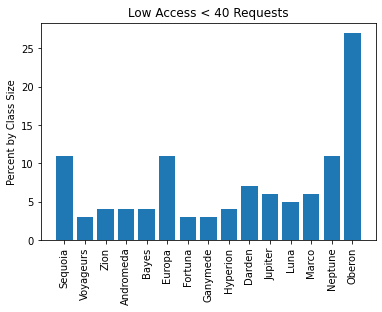

In [42]:
plt.bar(temp.cohort, temp.low_access_percent)
plt.xticks(rotation = 90)
plt.title("Low Access < 40 Requests")
plt.ylabel("Percent by Class Size")
plt.show()

In [43]:
round(float(cohort_df.low_access_during.sum()/cohort_df.class_size.sum()), 2)* 100

3.0

In [45]:
#len(temp.groupby('user_id').path.count()[temp.groupby('user_id').path.count() < 40])

In [46]:
cohort_df[['cohort', 'class_size']].sort_values(by=['class_size'], ascending=False)

,cohort,class_size
43,Neptune,37
1,Teddy,35
18,Voyageurs,34
38,Jupiter,33
14,Ulysses,33
...,...,...
15,Badlands,3
21,Franklin,2
34,Everglades,1
16,Apollo,1


In [55]:
df = acquire()
df = prepare.clean(df)

In [56]:
d={}
for value in list(df.name.unique()):
    cohort = df[df.name == value]
    endstamp = cohort.end_date.value_counts().index[0]
    
    d[value] = cohort[cohort.request_date_time > endstamp]

In [57]:
java_name_list = list(df[df.program == 'java'].name.unique())
ds_name_list = list(df[df.program == 'ds'].name.unique())
php_name_list = list(df[df.program == 'php'].name.unique())
fe_name_list = list(df[df.program == 'fe'].name.unique())

In [58]:
len(java_name_list)

27

In [62]:
for value in fe_name_list:
    print(value)
    print(d[value].url.value_counts().head(4))
    print('\n\n')

Apollo
content    4
Name: url, dtype: int64





### #1 Answer

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [ ]:
df = acquire()
df = clean(df)

In [ ]:
len(df)

In [ ]:
len(df[~df.name == 'Staff'])

In [ ]:
len(df)-len(df[df.name == 'Staff'])

In [ ]:
df = df[df.name != 'Staff']


4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?